# Ridge Regression 
in this tutorial we see how ridge regression affects overfitting and how it affect the weights.

#### - Preprocessing

In [1]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the data sets
dataset = pd.read_csv('../datasets/Salary_Data.csv')
x =  dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### - Functions for polynomial and ploting

In [3]:
# define a function that return whatever degree polynomial you want
def getPolynomial(data_input,degree=1):
    if degree == 1 :
        return data 
    from sklearn.preprocessing import PolynomialFeatures
    x_poly = PolynomialFeatures(degree= degree).fit_transform(data_input)
    return x_poly

# define a function for plotting
def plot(feature = [], actual = [], predicted = [], alpha = 1):
    plt.plot(feature, actual, '.', feature, predicted, '-')
    plt.title('alpha = {}'.format(alpha))
    plt.show()

In [4]:
x_poly = getPolynomial(x, 13)
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1.1,1.21,1.331,1.4641,1.61051,1.771561,1.948717,2.143589,2.357948,2.593742,2.853117,3.138428,3.452271
1,1.0,1.3,1.69,2.197,2.8561,3.71293,4.826809,6.274852,8.157307,10.604499,13.785849,17.921604,23.298085,30.287511
2,1.0,1.5,2.25,3.375,5.0625,7.59375,11.390625,17.085938,25.628906,38.443359,57.665039,86.497559,129.746338,194.619507
3,1.0,2.0,4.00,8.000,16.0000,32.00000,64.000000,128.000000,256.000000,512.000000,1024.000000,2048.000000,4096.000000,8192.000000
4,1.0,2.2,4.84,10.648,23.4256,51.53632,113.379904,249.435789,548.758735,1207.269218,2655.992279,5843.183014,12855.002631,28281.005788


#### - Ridge Model for Regularization

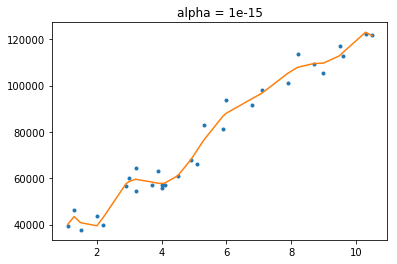

------------------


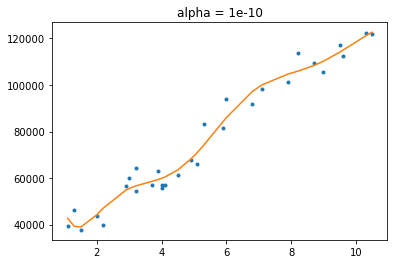

------------------


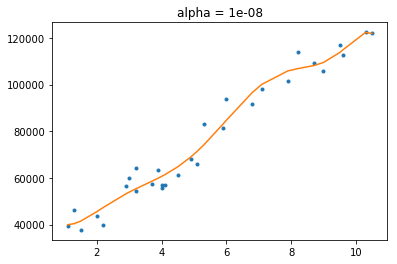

------------------


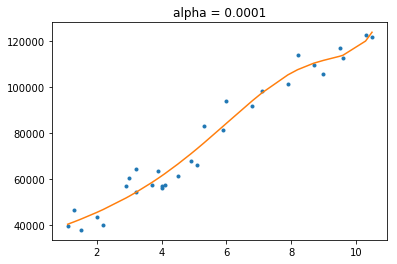

------------------


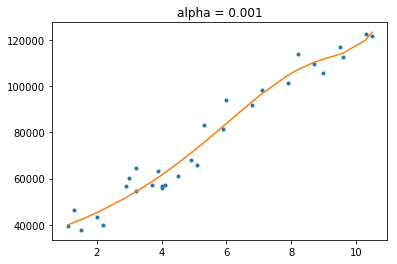

------------------


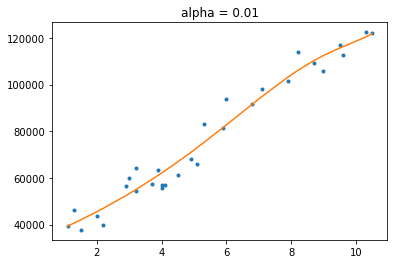

------------------


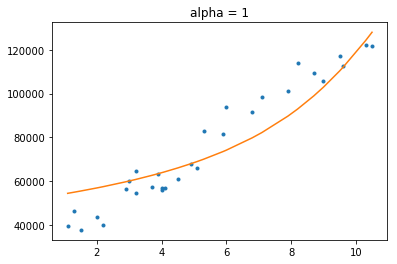

------------------


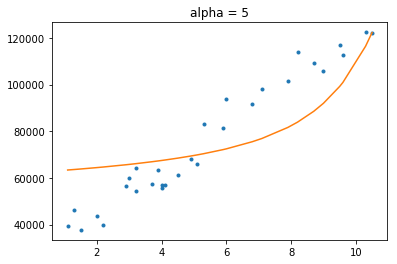

------------------


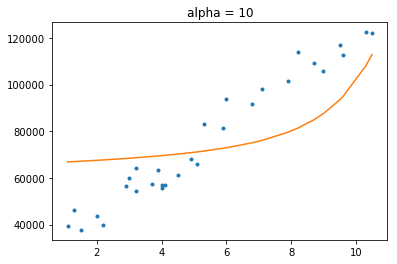

------------------


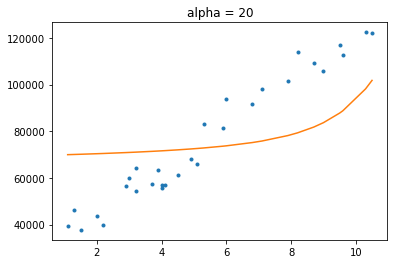

------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,3.891061e+06,-4.725055e+06,3.050534e+06,-1.145080e+06,252837.199110,-29715.602062,815.977613,213.095272,-1.874046e+01,-1.156690e+00,2.621430e-01,-1.523252e-02,3.123410e-04
1,0.0,-3.068964e+05,2.243614e+05,-7.367405e+04,1.066769e+04,-240.439560,-81.448582,1.639343,0.711027,1.082534e-02,-5.797790e-03,-2.756814e-04,6.002368e-05,-1.974989e-06
2,0.0,-4.804940e+04,3.605297e+04,-9.979540e+03,9.723684e+02,36.935747,-6.431377,-0.550472,0.012505,4.969444e-03,2.892364e-04,-1.795364e-05,-3.678313e-06,1.793845e-07
3,0.0,4.452555e+03,2.425004e+02,6.254287e+01,3.963058e+00,-0.112037,-0.046463,-0.005179,-0.000343,-8.174890e-06,1.429412e-06,2.523550e-07,2.115486e-08,1.688757e-10
4,0.0,4.107474e+03,4.958695e+02,3.642621e+01,1.266838e+00,-0.091074,-0.022148,-0.002561,-0.000218,-1.371388e-05,-4.049606e-07,5.380929e-08,1.348787e-08,1.974496e-09
5,0.0,5.554487e+03,3.629753e+02,1.934479e+01,5.205248e-01,-0.045318,-0.009716,-0.001113,-0.000099,-6.912963e-06,-3.118444e-07,9.589899e-09,4.945406e-09,8.616994e-10
6,0.0,2.188044e+03,1.444557e+02,1.051097e+01,7.697528e-01,0.055435,0.003865,0.000255,0.000015,7.373972e-07,1.229226e-08,-3.496760e-09,-7.103951e-10,-9.828774e-11
7,0.0,8.941246e+02,6.582931e+01,5.431431e+00,4.599458e-01,0.039302,0.003372,0.000290,0.000025,2.163521e-06,1.875132e-07,1.629446e-08,1.419797e-09,1.240566e-10
8,0.0,5.693583e+02,4.364517e+01,3.754488e+00,3.317047e-01,0.029583,0.002650,0.000238,0.000021,1.934704e-06,1.750520e-07,1.587843e-08,1.443968e-09,1.316510e-10
9,0.0,3.450661e+02,2.723639e+01,2.410519e+00,2.188300e-01,0.020026,0.001838,0.000169,0.000016,1.432315e-06,1.321125e-07,1.220245e-08,1.128746e-09,1.045736e-10


In [5]:
coeff_matrix = []
for lammda in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = lammda, normalize=True)
    ridge.fit(x_poly, y)                # x-train, y-train  ---> in the regression Model
    coeff_matrix.append(ridge.coef_)
    plot(x, y, ridge.predict(x_poly), alpha=lammda)
    print('------------------')
pd.DataFrame(coeff_matrix)              # note : the reduction of the coefficients and high bais with lammda--> inf

# Lasso Regression 
this tutorial shows how Lasso Regression effects Bais and weight coefficients

In [ ]:
# it works but in another notebook
coeff_matrix = []
for lammda in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]:
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = lammda, normalize=True, max_iter=1e5)
    lasso.fit(x_poly, y)
    coeff_matrix.append(lasso.coef_)
    plot(x, y, lasso.predict(x_poly), alpha=lammda)
    print('---------------d---')
pd.DataFrame(coeff_matrix)

We can see clearly how Lasso regression minimized the weights of the features that it reaches zero !
so, Lasso is used in some cases to do features selection